# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

# Import packages for data visualization
### YOUR CODE HERE ###
import seaborn as sns
import matplotlib.pyplot as plt

# Import packages for data preprocessing
### YOUR CODE HERE ###
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample
# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


==> ENTER YOUR RESPONSE HERE

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
### YOUR CODE HERE ###
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe(include='all')

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


Check for and handle missing values.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
### YOUR CODE HERE ###
data = data.dropna(axis=0)

In [10]:
# Display first few rows after handling missing values
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
# Check for duplicates
### YOUR CODE HERE ###
data.duplicated().sum()

0

Check for and handle outliers.

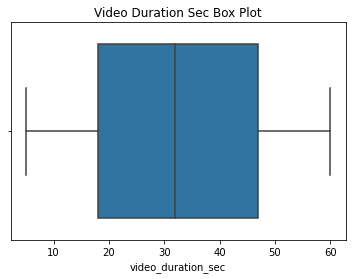

In [12]:
# Create a boxplot to visualize distribution of `video_duration_sec`
### YOUR CODE HERE ###
sns.boxplot(data['video_duration_sec'])
plt.title('Video Duration Sec Box Plot')
plt.show()


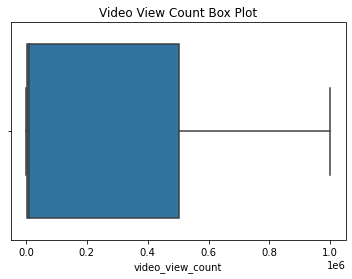

In [13]:
# Create a boxplot to visualize distribution of `video_view_count`
### YOUR CODE HERE ###
sns.boxplot(data['video_view_count'])
plt.title('Video View Count Box Plot')
plt.show()


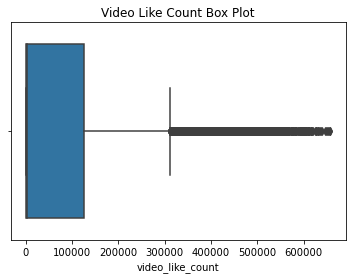

In [14]:
# Create a boxplot to visualize distribution of `video_like_count`
### YOUR CODE HERE ###
sns.boxplot(data['video_like_count'])
plt.title('Video Like Count Box Plot')
plt.show()


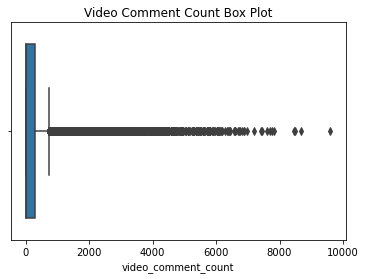

In [15]:
# Create a boxplot to visualize distribution of `video_comment_count`
### YOUR CODE HERE ###
sns.boxplot(data['video_comment_count'])
plt.title('Video Comment Count Box Plot')
plt.show()



In [16]:
# Check for and handle outliers for video_like_count
### YOUR CODE HERE ###
percentile25 = data['video_like_count'].quantile(.25)
percentile75 = data['video_like_count'].quantile(.75)

iqr = percentile75 - percentile25
upper_whisker = percentile75 + (1.5 * iqr)
data.loc[data['video_like_count']>upper_whisker, 'video_like_count'] = upper_whisker


Check class balance.

In [17]:
# Check class balance for video_comment_count
### YOUR CODE HERE ###
data["verified_status"].value_counts(normalize=True)

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [18]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
### YOUR CODE HERE ###
majority = data[data['verified_status'] == 'not verified']
minority = data[data['verified_status'] == 'verified']
# Upsample the minority class (which is "verified")
### YOUR CODE HERE ###
upsampled_minority = resample(minority,
                             replace=True, #resampling with replacement
                             n_samples=len(majority), #balance the number of class
                              random_state=69) #random seed
                              
# Combine majority class with upsampled minority class
### YOUR CODE HERE ###
upsampled_data = pd.concat([majority, upsampled_minority], axis = 0).reset_index(drop=True)
# Display new class counts
### YOUR CODE HERE ###
display(upsampled_data)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
35763,13425,opinion,4702079372,48,our hypothesis is that sloths can hold their b...,verified,active,289.0,94.0,27.0,1.0,0.0
35764,11516,opinion,3982152121,16,my thinking is that an espresso maker has been...,verified,active,786.0,191.0,64.0,3.0,0.0
35765,10701,opinion,7972268462,13,my friends feel that the most recorded song in...,verified,active,3437.0,1102.0,119.0,27.0,2.0
35766,9938,opinion,6149048482,48,i feel that pluto could theoretically sustain ...,verified,active,66.0,5.0,1.0,0.0,0.0


Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [19]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
### YOUR CODE HERE ###
upsampled_data[['video_transcription_text','claim_status']].groupby('claim_status').agg({'video_transcription_text':lambda array: np.mean([len(text) for text in array])})

,video_transcription_text
claim_status,
claim,95.178678
opinion,82.674628


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [20]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
upsampled_data['video_transcription_text_len'] = upsampled_data['video_transcription_text'].apply(lambda text: len(text))

In [21]:
# Display first few rows of dataframe after adding new column
### YOUR CODE HERE ###
upsampled_data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_text_len
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.000,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.000,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.000,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.000,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.000,4110.0,547.0,152.0,128
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.000,62303.0,4293.0,1857.0,127
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,311333.875,193911.0,8616.0,5446.0,95
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.000,50.0,22.0,11.0,99
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.000,1050.0,53.0,27.0,103
9,11,claim,8095102436,47,someone shared with me that an average user sp...,not verified,active,695641.0,238030.000,23062.0,1719.0,378.0,83


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

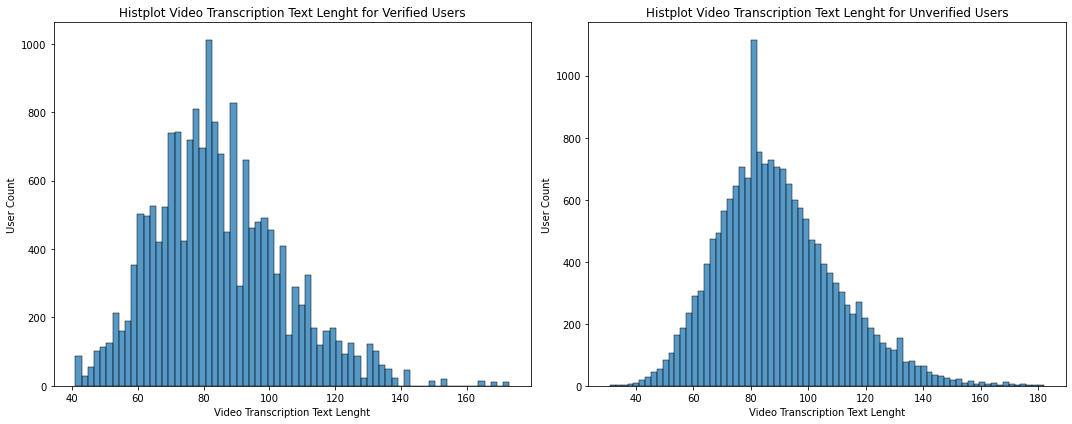

In [22]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
### YOUR CODE HERE ###
fig, axs = plt.subplots(1,2,figsize =(15,6))
sns.histplot(upsampled_data[upsampled_data['verified_status']=='verified']['video_transcription_text_len'], ax = axs[0])
axs[0].set_title('Histplot Video Transcription Text Lenght for Verified Users')
axs[0].set_xlabel('Video Transcription Text Lenght')
axs[0].set_ylabel('User Count')
sns.histplot(upsampled_data[upsampled_data['verified_status']=='not verified']['video_transcription_text_len'], ax = axs[1])
axs[1].set_title('Histplot Video Transcription Text Lenght for Unverified Users')
axs[1].set_xlabel('Video Transcription Text Lenght')
axs[1].set_ylabel('User Count')
fig.tight_layout()
fig.show()

### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [23]:
# Code a correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
upsampled_data.corr()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_text_len
#,1.000000,-0.001888,-0.009736,-0.697334,-0.627316,-0.505051,-0.489469,-0.415267,-0.190700
video_id,-0.001888,1.000000,0.012814,0.005142,0.008145,0.012454,0.013961,0.019228,0.000135
video_duration_sec,-0.009736,0.012814,1.000000,0.011331,0.002245,0.001023,0.003986,-0.004076,-0.011817
video_view_count,-0.697334,0.005142,0.011331,1.000000,0.856222,0.707897,0.690457,0.582796,0.242640
video_like_count,-0.627316,0.008145,0.002245,0.856222,1.000000,0.830016,0.806919,0.687429,0.212802
video_share_count,-0.505051,0.012454,0.001023,0.707897,0.830016,1.000000,0.708343,0.616325,0.167990
video_download_count,-0.489469,0.013961,0.003986,0.690457,0.806919,0.708343,1.000000,0.855224,0.169141
video_comment_count,-0.415267,0.019228,-0.004076,0.582796,0.687429,0.616325,0.855224,1.000000,0.145978
video_transcription_text_len,-0.190700,0.000135,-0.011817,0.242640,0.212802,0.167990,0.169141,0.145978,1.000000


Visualize a correlation heatmap of the data.

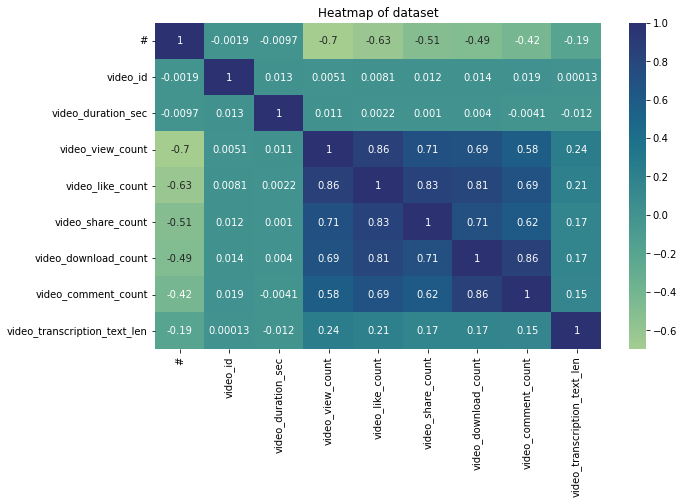

In [24]:
# Create a heatmap to visualize how correlated variables are
### YOUR CODE HERE ###
plt.figure(figsize=(10,6))
sns.heatmap(upsampled_data.corr(),annot=True, cmap = 'crest')
plt.title("Heatmap of dataset")
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [25]:
# Select outcome variable
### YOUR CODE HERE ###
y = upsampled_data[['verified_status']]

Select the features.

In [26]:
# Select features
### YOUR CODE HERE ###
X = upsampled_data[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

# Display first few rows of features dataframe
### YOUR CODE HERE ###
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [27]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .30, random_state = 69)

Confirm that the dimensions of the training and testing sets are in alignment.

In [28]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25037, 7) (10731, 7) (25037, 1) (10731, 1)


### **Task 3c. Encode variables**

Check the data types of the features.

In [29]:
# Check data types
### YOUR CODE HERE ###
X.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [30]:
# Get unique values in `claim_status`
### YOUR CODE HERE ###
X['claim_status'].unique()


array(['claim', 'opinion'], dtype=object)

In [31]:
# Get unique values in `author_ban_status`
### YOUR CODE HERE ###
X['author_ban_status'].unique()

array(['under review', 'active', 'banned'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [32]:
# Select the training features that needs to be encoded
### YOUR CODE HERE ###
features_need_encoding = X_train[['claim_status','author_ban_status']]

# Display first few rows
### YOUR CODE HERE ###
features_need_encoding.head()

,claim_status,author_ban_status
5619,claim,active
10476,opinion,active
4900,claim,banned
25498,opinion,active
24816,opinion,active


In [33]:
# Set up an encoder for one-hot encoding the categorical features
### YOUR CODE HERE ###
encoder = OneHotEncoder(drop='first',sparse=False)

In [34]:
# Fit and transform the training features using the encoder
### YOUR CODE HERE ###
features_encoded = encoder.fit_transform(features_need_encoding)

In [35]:
# Get feature names from encoder
### YOUR CODE HERE ###
encoder.get_feature_names()

array(['x0_opinion', 'x1_banned', 'x1_under review'], dtype=object)

In [36]:
# Display first few rows of encoded training features
### YOUR CODE HERE ###
features_encoded

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [37]:
# Place encoded training features (which is currently an array) into a dataframe
### YOUR CODE HERE ###
features_encoded_df = pd.DataFrame(data=features_encoded, columns=encoder.get_feature_names())

# Display first few rows
### YOUR CODE HERE ###
features_encoded_df.head()

,x0_opinion,x1_banned,x1_under review
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [38]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###
X_train = X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True)
X_train.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
0,20,361516.0,11756.0,1005.0,306.0
1,25,3054.0,3.0,4.0,1.0
2,5,628353.0,144733.0,2722.0,1036.0
3,48,6728.0,32.0,7.0,1.0
4,38,4617.0,187.0,12.0,1.0


In [58]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
### YOUR CODE HERE ###
X_train_final = pd.concat([X_train, features_encoded_df], axis = 1).reset_index(drop=True)
# Display first few rows
### YOUR CODE HERE ###
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,x0_opinion,x1_banned,x1_under review
0,20,361516.0,11756.0,1005.0,306.0,0.0,0.0,0.0
1,25,3054.0,3.0,4.0,1.0,1.0,0.0,0.0
2,5,628353.0,144733.0,2722.0,1036.0,0.0,1.0,0.0
3,48,6728.0,32.0,7.0,1.0,1.0,0.0,0.0
4,38,4617.0,187.0,12.0,1.0,1.0,0.0,0.0


Check the data type of the outcome variable.

In [40]:
# Check data type of outcome variable
### YOUR CODE HERE ###
y_train.dtypes

verified_status    object
dtype: object

In [41]:
# Get unique values of outcome variable
### YOUR CODE HERE ###
y_train['verified_status'].unique()

array(['not verified', 'verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [42]:
# Set up an encoder for one-hot encoding the categorical outcome variable
### YOUR CODE HERE ###
y_encoder = OneHotEncoder(drop='first',sparse=False)

In [43]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
### YOUR CODE HERE ###
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1,1)).ravel()
# Display the encoded training outcome variable
### YOUR CODE HERE ###
y_train_final

array([0., 0., 0., ..., 1., 0., 0.])

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [44]:
# Construct a logistic regression model and fit it to the training set
### YOUR CODE HERE ###
clf = LogisticRegression(random_state=69, max_iter=1000).fit(X_train_final, y_train_final)


<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [59]:
# Select the testing features that needs to be encoded
### YOUR CODE HERE ###
X_test_need_encoding = X_test[['claim_status', 'author_ban_status']] 

# Display first few rows
### YOUR CODE HERE ###
X_test_need_encoding.head()

,claim_status,author_ban_status
22927,opinion,active
28172,opinion,active
3096,claim,active
25096,opinion,under review
1445,claim,active


In [64]:
# Transform the testing features using the encoder
### YOUR CODE HERE ###
encoder = OneHotEncoder(drop='first', sparse = False)
X_test_encoded = encoder.fit_transform(X_test_need_encoding)
# Display first few rows of encoded testing features
### YOUR CODE HERE ###
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [66]:
# Place encoded testing features (which is currently an array) into a dataframe
### YOUR CODE HERE ###
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns = encoder.get_feature_names())

# Display first few rows
### YOUR CODE HERE ###
X_test_encoded_df.head()

,x0_opinion,x1_banned,x1_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,1.0,0.0,1.0
4,0.0,0.0,0.0


In [68]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###
X_test = X_test.drop(columns = ['claim_status', 'author_ban_status']).reset_index(drop=True)
X_test.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
0,56,4882.0,479.0,34.0,4.0
1,30,3220.0,169.0,16.0,4.0
2,36,413870.0,66598.0,5113.0,2591.0
3,14,1227.0,69.0,6.0,1.0
4,47,558442.0,41904.0,5527.0,3446.0


In [69]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
### YOUR CODE HERE ###
X_test_final = pd.concat([X_test,X_test_encoded_df],axis = 1)

# Display first few rows
### YOUR CODE HERE ###
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,x0_opinion,x1_banned,x1_under review
0,56,4882.0,479.0,34.0,4.0,1.0,0.0,0.0
1,30,3220.0,169.0,16.0,4.0,1.0,0.0,0.0
2,36,413870.0,66598.0,5113.0,2591.0,0.0,0.0,0.0
3,14,1227.0,69.0,6.0,1.0,1.0,0.0,1.0
4,47,558442.0,41904.0,5527.0,3446.0,0.0,0.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [70]:
# Use the logistic regression model to get predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred = clf.predict(X_test_final)

Display the predictions on the encoded testing set.

In [71]:
# Display the predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred

array([1., 1., 0., ..., 1., 1., 1.])

Display the true labels of the testing set.

In [72]:
# Display the true labels of the testing set
### YOUR CODE HERE ###
y_test

,verified_status
22927,verified
28172,verified
3096,not verified
25096,verified
1445,not verified
...,...
20352,verified
26068,verified
14433,not verified
19212,verified


Encode the true labels of the testing set so it can be compared to the predictions.

In [86]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
### YOUR CODE HERE ###
y_test_final = y_encoder.transform(y_test.values.reshape(-1,1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 1., 0., ..., 0., 1., 1.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [89]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
print(X_train_final.shape, X_test_final.shape, y_train_final.shape, y_test_final.shape, y_pred.shape)

(25037, 8) (10731, 8) (25037,) (10731,) (10731,)


### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

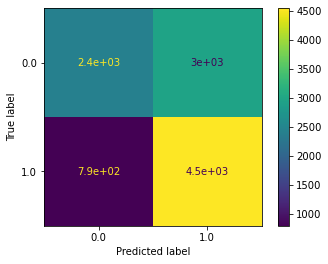

In [91]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
cm = confusion_matrix(y_test_final, y_pred, labels=clf.classes_)
# Create display of confusion matrix
### YOUR CODE HERE ###
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
# Plot confusion matrix
### YOUR CODE HERE ###
disp.plot()
# Display plot
### YOUR CODE HERE ###
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [96]:
# Create a classification report
### YOUR CODE HERE ###
target_labels = ['verified', 'not verified' ]
class_rep = classification_report(y_test_final, y_pred, target_names = target_labels)
print(class_rep)

              precision    recall  f1-score   support

    verified       0.76      0.45      0.56      5396
not verified       0.61      0.85      0.71      5335

    accuracy                           0.65     10731
   macro avg       0.68      0.65      0.64     10731
weighted avg       0.68      0.65      0.64     10731



### **Task 4c. Interpret model coefficients**

In [112]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
### YOUR CODE HERE ###
pd.DataFrame(data={"Feature Name":X_train_final.columns, "Model Coefficient":clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,0.008627
1,video_view_count,-0.000002
2,video_share_count,0.000004
3,video_download_count,-0.000160
4,video_comment_count,0.000301
5,x0_opinion,0.000380
6,x1_banned,-0.000012
7,x1_under review,-0.000004


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

==>